# Sebastian Schwab
> EE 399 HW3

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import svd

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Scale the data to [0, 1]


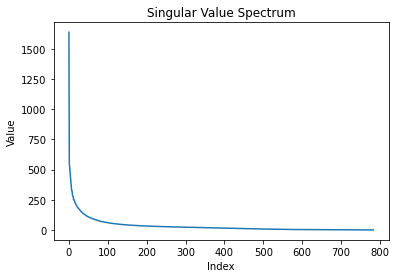

In [3]:
import numpy as np


# Reshape each image into a column vector and store them in a data matrix
X_reshaped = np.reshape(X, (X.shape[0], -1)).T

# Perform SVD analysis on the data matrix
U, s, Vt = np.linalg.svd(X_reshaped, full_matrices=False)

# Plot the singular values
plt.plot(s)
plt.title('Singular Value Spectrum')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [4]:
total_energy = np.sum(s**2)
cumulative_energy = np.cumsum(s**2)
threshold = 0.95 * total_energy  # You can adjust the threshold as needed

# Find the optimal rank
optimal_rank = np.argmax(cumulative_energy > threshold) + 1

print(f"Optimal rank (r) for image reconstruction: {optimal_rank}")

Optimal rank (r) for image reconstruction: 102


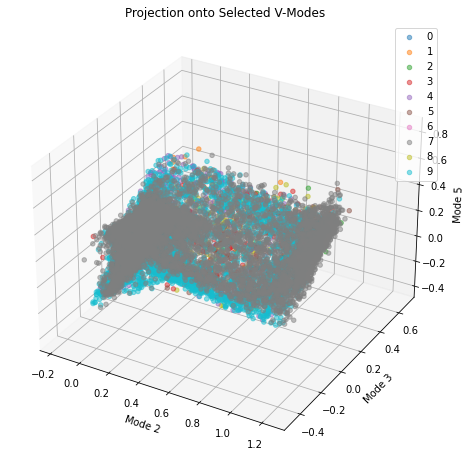

In [9]:
# Select columns 2, 3, and 5 from the Vt matrix
selected_modes = Vt[:,[1, 2, 4]]

# Project the data onto the selected modes
projected_data = np.dot(X_reshaped.T, selected_modes)

# Get the digit labels from the mnist dataset
labels = mnist.target.astype(int)

# Create a 3D scatter plot of the projected data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for digit in range(10):
    mask = labels == digit
    ax.scatter(projected_data[mask, 0], projected_data[mask, 1], projected_data[mask, 2], label=str(digit), alpha=0.5)

ax.set_xlabel('Mode 2')
ax.set_ylabel('Mode 3')
ax.set_zlabel('Mode 5')
plt.title('Projection onto Selected V-Modes')
ax.legend()
plt.show()

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Select two digits to classify
digit_1, digit_2 = 1, 0

# Filter the data to only include the selected digits
mask = np.logical_or(labels == digit_1, labels == digit_2)
X_filtered = X[mask]
labels_filtered = labels[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.3, random_state=42)

# Train an LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print("~~~~~TRAIN Data~~~~~~")
# Make predictions on the testing set
y_predTR = lda.predict(X_train)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_train, y_predTR)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_predTR)}")
print(f"Classification Report:\n{classification_report(y_train, y_predTR)}")

print("~~~~~TEST Data~~~~~~")
# Make predictions on the testing set
y_pred = lda.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


~~~~~TRAIN Data~~~~~~
Accuracy: 0.9948772472453122
Confusion Matrix:
[[4745   19]
 [  34 5548]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4764
           1       1.00      0.99      1.00      5582

    accuracy                           0.99     10346
   macro avg       0.99      0.99      0.99     10346
weighted avg       0.99      0.99      0.99     10346

~~~~~TEST Data~~~~~~
Accuracy: 0.9952638700947226
Confusion Matrix:
[[2130    9]
 [  12 2283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2139
           1       1.00      0.99      1.00      2295

    accuracy                           1.00      4434
   macro avg       1.00      1.00      1.00      4434
weighted avg       1.00      1.00      1.00      4434



In [21]:
# Select three digits to classify
digit_1, digit_2, digit_3 = 1, 3, 0

# Filter the data to only include the selected digits
mask = np.logical_or.reduce((labels == digit_1, labels == digit_2, labels == digit_3))
X_filtered = X[mask]
labels_filtered = labels[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.3, random_state=42)

# Train an LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print("~~~~~TRAIN Data~~~~~~")
# Make predictions on the testing set
y_predTR = lda.predict(X_train)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_train, y_predTR)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_predTR)}")
print(f"Classification Report:\n{classification_report(y_train, y_predTR)}")

print("~~~~~TEST Data~~~~~~")
# Make predictions on the testing set
y_pred = lda.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


~~~~~TRAIN Data~~~~~~
Accuracy: 0.987356621480709
Confusion Matrix:
[[4819   10   32]
 [   1 5444   55]
 [  24   72 4887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4861
           1       0.99      0.99      0.99      5500
           3       0.98      0.98      0.98      4983

    accuracy                           0.99     15344
   macro avg       0.99      0.99      0.99     15344
weighted avg       0.99      0.99      0.99     15344

~~~~~TEST Data~~~~~~
Accuracy: 0.9802341493081952
Confusion Matrix:
[[2022    8   12]
 [   4 2330   43]
 [  19   44 2095]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2042
           1       0.98      0.98      0.98      2377
           3       0.97      0.97      0.97      2158

    accuracy                           0.98      6577
   macro avg       0.98      0.98      0.98      6577
w

In [15]:
# SVM for ALL 10 digits
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.9817142857142858
Confusion Matrix:
[[2037    1    4    0    1    1    9    1    4    0]
 [   0 2347    7    5    1    0    0    4    0    0]
 [   3    6 2091    3    3    2    3   12    7    3]
 [   1    1   19 2120    2   11    0    8   10    4]
 [   3    4    2    0 1904    0    1    4    1   17]
 [   3    1    0   14    3 1874   12    0    5    3]
 [   1    2    0    0    6    5 2073    0    1    0]
 [   1    5   15    0    7    2    0 2208    1    9]
 [   4    7    6   11    3    4    9    4 1935    9]
 [  10    9    2    8   14    2    1   13    4 2027]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.98      2133
           3       0.98      0.97      0.98      2176
           4       0.98      0.98      0.98      1936
           5       0.99      0.98      0.98      1915
           6       0

In [22]:
# SVM for TWO digits

# Select two digits to classify
digit_1, digit_2 = 1, 0

# Filter the data to only include the selected digits
mask = np.logical_or(labels == digit_1, labels == digit_2)
X_filtered = X[mask]
labels_filtered = labels[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.3, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

print("~~~~~TRAIN Data~~~~~~")
# Make predictions on the testing set
y_predTR = svm.predict(X_train)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_train, y_predTR)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_predTR)}")
print(f"Classification Report:\n{classification_report(y_train, y_predTR)}")

print("~~~~~TEST Data~~~~~~")
# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


~~~~~TRAIN Data~~~~~~
Accuracy: 1.0
Confusion Matrix:
[[4764    0]
 [   0 5582]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4764
           1       1.00      1.00      1.00      5582

    accuracy                           1.00     10346
   macro avg       1.00      1.00      1.00     10346
weighted avg       1.00      1.00      1.00     10346

~~~~~TEST Data~~~~~~
Accuracy: 0.9997744700045106
Confusion Matrix:
[[2138    1]
 [   0 2295]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      2295

    accuracy                           1.00      4434
   macro avg       1.00      1.00      1.00      4434
weighted avg       1.00      1.00      1.00      4434



In [17]:
# Decision tree for ALL digits

from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.8683333333333333
Confusion Matrix:
[[1886    2   28   14   10   38   35    7   24   14]
 [   1 2270   19   20    7    7   12    5   20    3]
 [  41   25 1784   49   38   17   32   44   71   32]
 [  15   21   54 1831   12  106   13   32   50   42]
 [  10   12   22   11 1678   14   24   32   33  100]
 [  32   22   18  101   24 1554   48    8   57   51]
 [  22   11   22   18   43   41 1885    1   34   11]
 [   5   25   47   28   27    9    3 2034   19   51]
 [  27   23   66   87   35   53   44   33 1560   64]
 [  15   11   20   46  100   45    6   49   45 1753]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2058
           1       0.94      0.96      0.95      2364
           2       0.86      0.84      0.85      2133
           3       0.83      0.84      0.84      2176
           4       0.85      0.87      0.86      1936
           5       0.82      0.81      0.82      1915
           6       0

In [23]:
# Decision tree for TWO digits

# Select two digits to classify
digit_1, digit_2 = 1, 0

# Filter the data to only include the selected digits
mask = np.logical_or(labels == digit_1, labels == digit_2)
X_filtered = X[mask]
labels_filtered = labels[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("~~~~~TRAIN Data~~~~~~")
# Make predictions on the testing set
y_predTR = dt.predict(X_train)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_train, y_predTR)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_predTR)}")
print(f"Classification Report:\n{classification_report(y_train, y_predTR)}")

print("~~~~~TEST Data~~~~~~")
# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


~~~~~TRAIN Data~~~~~~
Accuracy: 1.0
Confusion Matrix:
[[4764    0]
 [   0 5582]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4764
           1       1.00      1.00      1.00      5582

    accuracy                           1.00     10346
   macro avg       1.00      1.00      1.00     10346
weighted avg       1.00      1.00      1.00     10346

~~~~~TEST Data~~~~~~
Accuracy: 0.9961659900766802
Confusion Matrix:
[[2131    8]
 [   9 2286]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      2295

    accuracy                           1.00      4434
   macro avg       1.00      1.00      1.00      4434
weighted avg       1.00      1.00      1.00      4434

